In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.metrics import pairwise_distances_argmin_min
import time

# Define some help variables for sns and future use
sns.set(rc={'figure.figsize':(14,10)})
threeColors = ['Red', 'Blue', 'Green']
tenColors = ['Red', 'Blue', 'Green', 'Violet', 'Pink', 'Orange', 'Yellow', 'Olive', 'Brown', 'Magenta']

# Clustering Exercise

Contributors: Eric Keränen, Samuel Aitamaa & Teemu Luhtanen

## Part I

Visualize the client locations by making a two-dimensional scatterplot.

Using k-means clustering, find optimal locations (i.e. x and y
coordinates) for three drone depots. Each depot should serve its
surrounding clients.

In [2]:
# Read the data
df = pd.read_csv("drone_delivery.csv", sep = ";", na_values = "?")

# Drop the id column, since it doesn't serve a purpose here
df.drop(columns=["clientid"], inplace = True)
df.describe().round(2)

,x,y
count,5956.00,5956.00
mean,508.82,427.55
std,271.06,289.04
min,0.02,0.04
25%,282.58,170.08
50%,518.10,397.79
75%,727.16,669.98
max,999.53,999.73


In [3]:
# Define a function which makes it easy to do the clustering
# Parameter takes in the number of cluster the cluster should have
def do_the_clustering(CLUSTER_NUM):
    # Start taking time
    t0 = time.time()
    
    # Define cluster method and define how many clusters there should be
    kmeans = cluster.KMeans(n_clusters = CLUSTER_NUM)
    # Start clustering, find centroids
    kmeans.fit(df)
    
    # End taking time
    t1 = time.time()
    print (f"Time taken to cluster: {round(t1- t0, 2)} s")
    
    return kmeans

In [4]:
kmeans = do_the_clustering(3)

colnames = df.columns.to_numpy()
# Extract the centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = colnames)
print (centroids_df)

Time taken to cluster: 0.09 s
            x           y
0  548.006019  787.243816
1  702.213116  211.327341
2  198.536354  382.885756


Above you can see the optimal locations for the drones (coordinates). Below you can see the optimal drone locations in a scatterplot.

<AxesSubplot:xlabel='x', ylabel='y'>

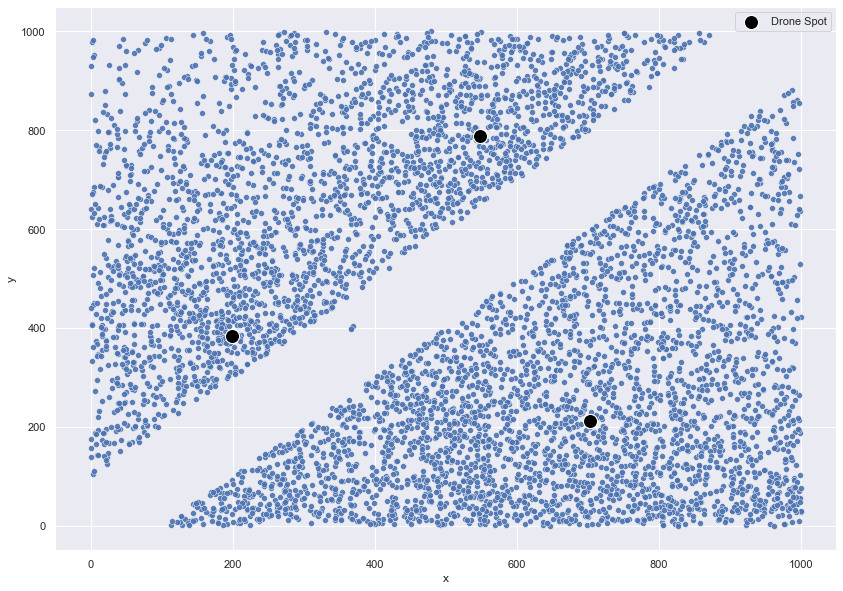

In [5]:
# Visualize centroids and all clients
sns.scatterplot(data = df, x = "x", y = "y", alpha = .9)
sns.scatterplot(data = centroids_df, x = "x", y = "y", s = 200, label = "Drone Spot", color = ['Black'])

## Part II

Attach the information on the closest depot to each client. That is, generate a data
frame that is similar to the original one with the exception that it has an additional
column that contains the identifier of the depot nearest to the client. Print the first 10
rows of the new data frame.

In [6]:
coords_and_centroids_df = pd.DataFrame(df)
coords_and_centroids_df["centroid"] = kmeans.labels_
print (coords_and_centroids_df.head(10))

            x           y  centroid
0  622.771572  164.857623         1
1  416.357298  630.193634         0
2  292.735020  567.333231         2
3  737.211288  166.225676         1
4  540.475375  682.912298         0
5  535.469492  318.439661         1
6  640.380050  870.833221         0
7  235.772075  359.048203         2
8  481.896884  661.491838         0
9  730.032789  312.177817         1


## Part III

Make a scatterplot that uses three different colours. The markers with the same colour
are served by the same depot.

<AxesSubplot:xlabel='x', ylabel='y'>

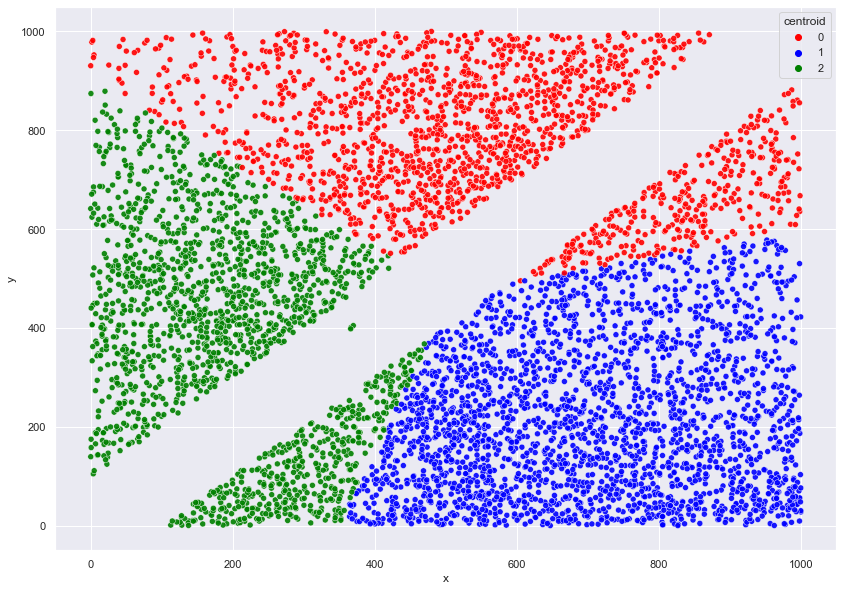

In [7]:
# Visualize domains using the extra column from the just created data frame
sns.scatterplot(data = coords_and_centroids_df, x = "x", y = "y", palette = threeColors, hue = coords_and_centroids_df["centroid"], alpha = .9)

## Part IV

Play with the number of depots. What are the optimal locations for 10 depots, for
example? Do you see a difference in the computation time when the number of depots
increases?

Time taken to cluster: 0.31 s


<AxesSubplot:xlabel='x', ylabel='y'>

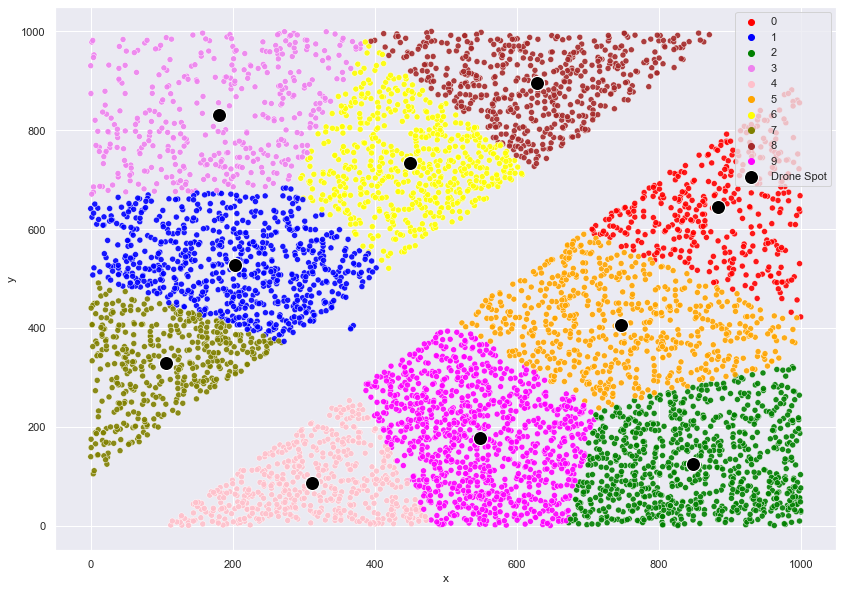

In [8]:
kmeans = do_the_clustering(10)

colnames = df.columns.to_numpy()
# Extract the centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = colnames)

# Visualize 10 centroids and their domain of dominance
sns.scatterplot(data = df, x = "x", y = "y", palette = tenColors, hue = kmeans.labels_, alpha = .9)
sns.scatterplot(data = centroids_df, x = "x", y = "y", s = 200, label = "Drone Spot", color = ['Black'])

As the number of clusters increase, so does the computation time.

## Part V

Replace k-means with agglomerative hierarchical clustering and explore it with various
depot numbers. What are your observations?

In [9]:
# Define a function which makes it easy to do the agglomerative clustering
# Parameter takes in the number of cluster the cluster should have
def do_the_agglo_clustering(CLUSTER_NUM):
    # Time at the start
    t0 = time.time()
    
    # Define cluster method and define how many clusters there should be
    agglo = cluster.AgglomerativeClustering(n_clusters = CLUSTER_NUM)
    # Start clustering, find centroids
    agglo.fit(df)
    
    # Time at the end
    t1 = time.time()
    print (f"Time taken to cluster: {round(t1- t0, 2)} s")
    
    return agglo

Time taken to cluster: 0.77 s


<AxesSubplot:xlabel='x', ylabel='y'>

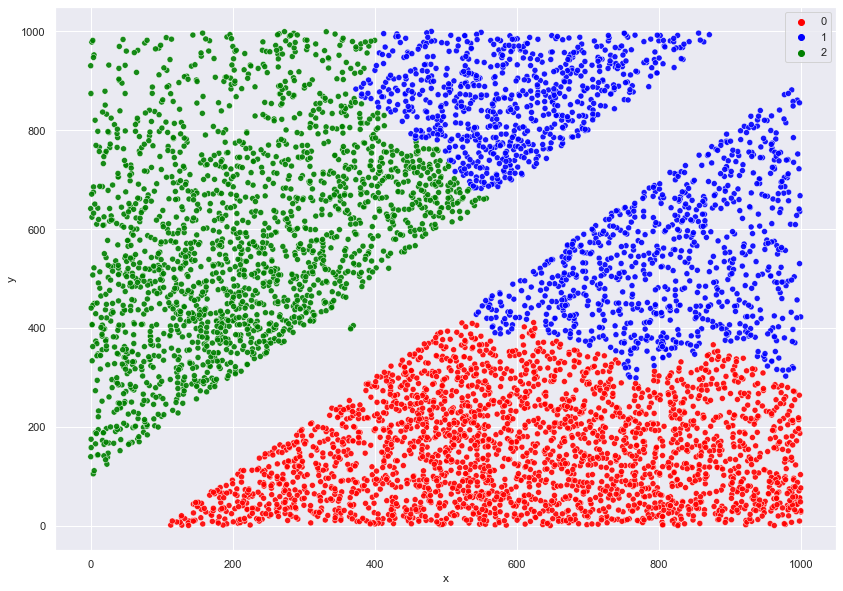

In [10]:
agglo = do_the_agglo_clustering(3)

sns.scatterplot(data = df, x = "x", y = "y", palette = threeColors, hue = agglo.labels_, alpha = .9)

Time taken to cluster: 0.92 s


<AxesSubplot:xlabel='x', ylabel='y'>

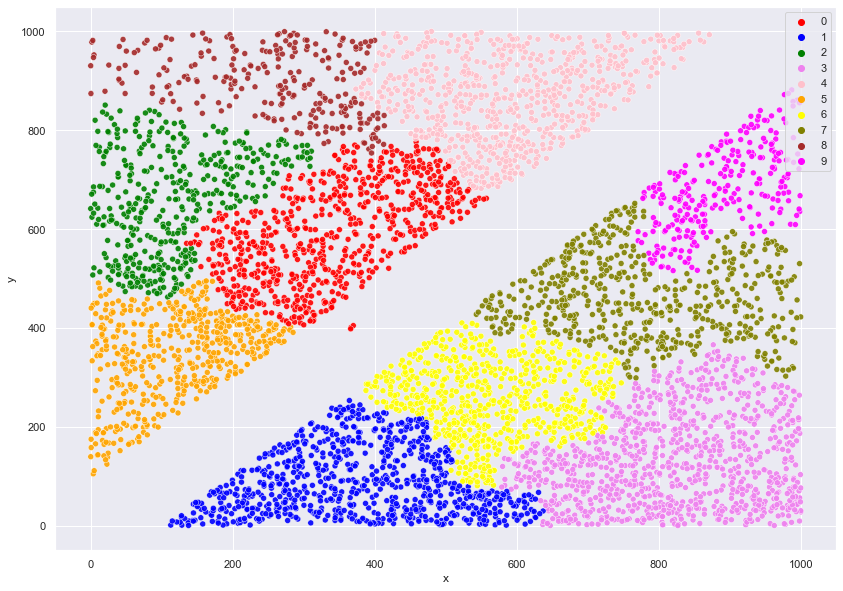

In [11]:
agglo = do_the_agglo_clustering(10)

sns.scatterplot(data = df, x = "x", y = "y", palette = tenColors, hue = agglo.labels_, alpha = .9)

Agglomerative clustering compared to KMeans is slower. KMeans performs, according to our test, ~0.5s faster than agglomerative clustering.

In KMeans the borders between clusters are sharp and linear, whereas in agglomerative clustering the borders between clusters are more defined / profound. 